# 사전 학습된 CNN

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline

#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


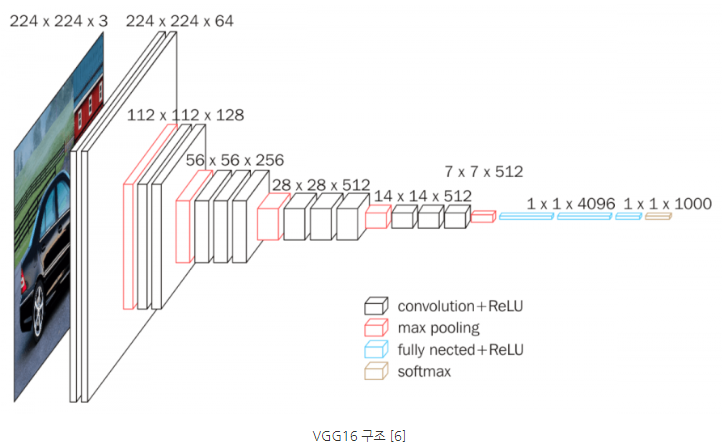

In [3]:
from IPython.display import Image
Image(filename='VGG16.png')

In [2]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')

#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')

#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')

#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  

17227776/17225924 [==============================] - 5s 0us/step


In [34]:
vgg_model.summary()    # 138,357,544 (파라미터 수)
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

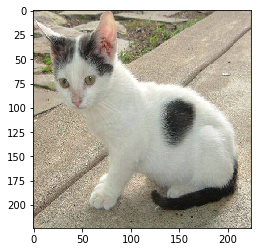

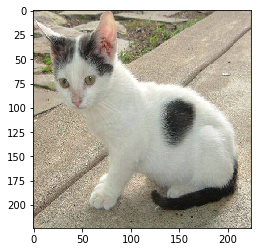

image batch size (1, 224, 224, 3)


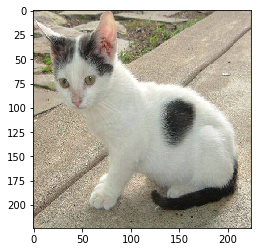

In [29]:
filename = 'cat.jpg'
original = load_img(filename, target_size=(224, 224)) #영상크기 224x224로 고정
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [33]:
#VGG_model
processed_image = vgg16.preprocess_input(image_batch.copy()) 
#copy하는 이유는 안전하게 저장하기위해
predictions = vgg_model.predict(processed_image)
print(predictions.shape)

label_vgg = decode_predictions(predictions, top=10) #확률값이 가장 높은 10개만 가져와라
print(label_vgg) #(id,이미지이름,확률값),...

(1, 1000)
[[('n02123597', 'Siamese_cat', 0.3093419), ('n01877812', 'wallaby', 0.080341235), ('n02326432', 'hare', 0.075098425), ('n02325366', 'wood_rabbit', 0.05053069), ('n03223299', 'doormat', 0.04817361), ('n02328150', 'Angora', 0.047498785), ('n02124075', 'Egyptian_cat', 0.043961022), ('n02108915', 'French_bulldog', 0.03665566), ('n02087046', 'toy_terrier', 0.015123252), ('n03793489', 'mouse', 0.011756639)]]


In [15]:
#resnet_model
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02124075', 'Egyptian_cat', 0.17055017),
  ('n02123597', 'Siamese_cat', 0.1224575),
  ('n03958227', 'plastic_bag', 0.11745582)]]

In [16]:
#mobilenet
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n03958227', 'plastic_bag', 0.15703687),
  ('n02124075', 'Egyptian_cat', 0.11697344),
  ('n02123597', 'Siamese_cat', 0.10532676),
  ('n02123045', 'tabby', 0.07564836),
  ('n02909870', 'bucket', 0.054681532)]]

In [18]:
filename = 'cat.jpg'
original = load_img(filename, target_size=(299, 299)) #299x299로 바꿔줌
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

#inception_model
processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02124075', 'Egyptian_cat', 0.6622583),
  ('n02123045', 'tabby', 0.050285134),
  ('n02123597', 'Siamese_cat', 0.03638144),
  ('n02123159', 'tiger_cat', 0.023522405),
  ('n03223299', 'doormat', 0.015205649)]]

In [22]:
import cv2
img = cv2.imread("cat.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {},{:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]),
            (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {},{:.2f}".format(
    label_mobilenet[0][0][1], label_mobilenet[0][0][2]), 
            (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {},{:.2f}".format(
    label_inception[0][0][1], label_inception[0][0][2]), 
            (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {},{:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]), 
            (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("out.jpg", img)

True